# Lenguajes formales

Desde el nacimiento estamos expuestos a *lenguajes naturales*; estos son
lenguajes escritos y hablados por los seres humanos, como el español, el
japonés, el griego, etc.
Estos lenguajes han evolucionado a través de los siglos como especies vivientes,
y los lingüistas los estudian como tales.
Aunque los lenguajes naturales tienen reglas de sintaxis y semántica, estas
reglas son muy complejas, contienen muchas excepciones, y cada dialecto tiene
sus propias variantes.
Véase esta canción sobre lo [difícil que es hablar el español][1] (nótese que la
letra es explícita).

Los *lenguajes artificiales* son aquellos que han sido creados por los seres
humanos para aplicaciones específicas.
Por ejemplo, el esperanto es un lenguaje diseñado para la comunicación entre
naciones de diferentes lenguas europeas, el Klingon es un lenguaje inventado
para la serie de televisión Star Trek, y J. R. Tolkien creó varios lenguajes
para sus novelas de fantasía.

Los *lenguajes formales* son una forma de lenguaje artificial definido con
reglas de sintaxis y semántica muy precisas... matemáticamente precisas, de
hecho.
En efecto, el propio lenguaje matemático, con sus símbolos de operaciones y
relaciones, es una especie de lenguaje formal; también las fórmulas químicas
están definidas por un lenguaje formal.
Finalmente, dentro de esta categoría están todos los *lenguajes de
programación*, diseñados concretamente para expresar algoritmos.

[1]: https://www.youtube.com/watch?v=eyGFz-zIjHE

## 1. Describir un lenguaje de programación

En lingüística, un lenguaje se describe en tres niveles:
- *Gramática*: Definida por un alfabeto, léxico, y reglas de sintaxis, 
  responde la pregunta "¿qué es una oración válida en este lenguaje?".
- *Semántica*: Atribuye un significado a las oraciones válidas, responde la
  pregunta "¿qué significa esta oración?".
- *Pragmática*: Define el uso del lenguaje, responde la pregunta "¿cómo usamos
  este enunciado significativo?". Diferentes enunciados con el mismo significado
  pueden ser usados de formas distintas por diferentes personas y en diferentes
  contextos.

**Ejemplo** Consideremos un lenguaje natural usado para describir recetas de
cocina en español.
La gramática de este lenguaje está definida por el alfabeto español, el léxico
se conforma de palabras que se usan en recetas, como "mezclar", "batir",
"leche", "huevos", etc.
La semántica de este lenguaje está dada por el significado de las palabras, por
ejemplo, "mezclar" significa combinar dos o más ingredientes en un recipiente.
Finalmente, la pragmática le indica al lector cómo usar las instrucciones de la
receta para preparar el platillo.

En el caso de los lenguajes de programación podemos agregar la *implementación*,
que responde la pregunta "¿cómo se realiza este enunciado de forma que respete
el significado?".
Continuando el ejemplo anterior, la implementación de una receta la realiza un
cocinero, siguiendo las instrucciones de la receta y definiendo de manera
precisa (a veces sin darse cuenta) los pasos a seguir para preparar el platillo.
Así, "sal al gusto" puede significar "agrega sal hasta que el sabor sea de tu
agrado", y la implementación de esta instrucción depende de la experiencia del
cocinero.

**Actividad** Explorar la [Referencia del Lenguaje Python][1] su definición
gramatical, semántica y pragmática.

[1]: https://docs.python.org/es/3/reference/index.html

## 2. Gramáticas y lenguajes formales
Para describir un lenguaje formal, se requieren conceptos de teoría de lenguajes
formales, que son el estudio de la *Teoría de la Computación*.
En esta sección se presentan los conceptos básicos de esta teoría, y se
presentan las *gramáticas libres de contexto*, que son las que se usan para
definir los lenguajes de programación.

### 2.1 Conceptos de cadenas y lenguajes

Un **alfabeto** es un conjunto finito de *símbolos*.
La naturaleza de los símbolos nos es irrelevante para la teoría de lenguajes,
pero se entiende que son elementos claramente distinguibles entre sí.
Usamos las letras griegas mayúsculas como $\Sigma$ y $\Gamma$ para denotar
alfabetos, y letras de tipo `monoespaciado` para denotar cadenas de símbolos.

El alfabeto más usado por las computadoras es el **alfabeto binario**:
$$\Sigma = \{\texttt{0}, \texttt{1}\}$$
pero en general se puede usar cualquier alfabeto, por ejemplo, el alfabeto
español:
$$\Sigma = \{\texttt{a}, \texttt{b}, \texttt{c}, \ldots, \texttt{z}\}$$


En particular, Python utiliza el alfabeto [Unicode][1], que contiene más de
100,000 símbolos, incluyendo letras, números, símbolos matemáticos, emojis,
carácteres chinos, etc.

[1]: https://unicode.org/

In [ ]:
# La función chr permite convertir un número de símbolo Unicode en el
# carácter correspondiente.
for codigo in [104, 111, 108, 97]:
    print(f"{codigo} ↦ {chr(codigo)!r}")

Una cadena (usualmente denotada con la letra $w$) es una secuencia finita de
símbolos de un alfabeto $\Sigma$; se denota con los símbolos yuxtapuestos, sin
comas entre sus elementos, por ejemplo:
$$w = \texttt{hola}$$
$$w = \texttt{010101}$$

La **longitud** de una cadena $w$ se denota con $\left|w\right|$, y es el número de
símbolos que contiene:
$$\left|\texttt{hola}\right| = 4$$

In [ ]:
# En Python, las cadenas se pueden definir con comillas simples o dobles.
w = "hola"
w

In [ ]:
# La longitud de una cadena se puede obtener con la función len.
len(w)

Existe una cadena especial, llamada **cadena vacía** y denotada con
$\varepsilon$, que no contiene símbolos:

In [ ]:
epsilon = ""
len(epsilon)

Decimos que una cadena $z$ es una **subcadena** de otra cadena $w$ si los
símbolos de $z$ aparecen consecutivamente en cualquier parte de $w$.
Por ejemplo, `cara`, `cola` y `araco` son algunas de las subcadenas de
`caracola`.


In [ ]:
# En Python, podemos determinar si una cadena es subcadena de otra con
# el operador "in".
w = "caracola"
print("cara" in w)
print("cola" in w)
print("araco" in w)
print("maraca" in w)
print("" in w)  # La cadena vacía es subcadena de cualquier cadena.

Dado que tenemos dos cadenas $x$ y $y$, podemos **concatenarlas** para formar
una nueva cadena $xy$.
En matemáticas esta se denota simplemente yuxtaponiendo las cadenas, de la misma
manera que la multiplicación en álgebra.
En cambio, los lenguajes de programación suelen usar operadores como `+` o `&`.

In [ ]:
# En Python la concatenación de cadenas se realiza con el operador +.
"col" + "chones"

Si la multiplicación repetida es la potenciación, entonces la concatenación
repetida es la **potenciación de cadenas**.
Por ejemplo, si $w = \texttt{na}$, entonces $w^3 = \texttt{nanana}$, de manera
que $\texttt{ba}{(\texttt{na})}^2 = \texttt{banana}$.

In [ ]:
# En Python la repetición de cadenas se realiza con el operador *.
"ba" + 2 * "na"

El **orden lexicográfico** es el orden que se usa para ordenar las palabras en
un diccionario.

In [ ]:
# En Python las cadenas están ordenadas lexicográficamente.

cadenas = [
    "col",
    "itacate",
    "zapote",
    "calabaza",
    "panal",
    "pan",
    "jitomate",
    "aguacate",
]
cadenas.sort()
cadenas

Las computadoras suelen utilizar una equivalencia entre números y símbolos para
compararlas.
En nuestro caso, Python utiliza el alfabeto Unicode.

In [ ]:
# La función ord es la función inversa de chr, es decir que permite
# obtener el código Unicode de un carácter.

palabra = "talavera"
for simbolo in palabra:
    print(f"{simbolo!r} ↦ {ord(simbolo)}")

In [ ]:
# Nótese que en Unicode, las mayúsculas preceden a las minúsculas:
palabra = "ABZabz"
for simbolo in palabra:
    print(f"{simbolo!r} ↦ {ord(simbolo)}")

In [ ]:
# Mayúsculas antes que minúsculas.
"Zapato" < "alfombra"

Usualmente preferimos usar otro orden de manera que las palabras más pequeñas
aparezcan primero, este es el orden **shortléxico**, o simplemente **orden
de cadenas**.

In [ ]:
from materiales.lenguajes.numerabilidad import Shortlex

# Ordenar utilizando el orden shortléxico.
cadenas.sort(key=Shortlex)
cadenas

Un **lenguaje** es un conjunto (finito o infinito) de cadenas.

In [ ]:
print("Este es un lenguaje finito:")
print(cadenas)

En computación los lenguajes se pueden representar como una colección (lista,
cadena, etc.), pero esto solo funciona con lenguajes finitos.
Una forma alternativa es utilizar un **enumerador**, que es un algoritmo que
produce todos los elementos de un conjunto.

En Python los enumeradores se pueden implementar con *generadores*, que son
funciones que producen un valor cada vez utilizando la palabra reservada
`yield`.

In [ ]:
from typing import Iterator


# Definimos un iterador que enumera los puntos cardinales.
def puntos_cardinales() -> Iterator[str]:
    yield "este"
    yield "norte"
    yield "oeste"
    yield "sur"


# Un iterador es un objeto que avanza sobre una sucesión de elementos
# cada vez que se llama a la función next.
iterador = puntos_cardinales()
print(next(iterador).upper())
print(next(iterador).upper())
print(next(iterador).upper())
print(next(iterador).upper())
# Cando se agotan los elementos se produce una excepción StopIteration.
# next(iterador)   # Descomenta esta línea para ver el error.

In [ ]:
# Un iterador se suele recorrer con un ciclo for
for punto_cardinal in puntos_cardinales():
    print(punto_cardinal.upper())

In [ ]:
# La clase `list` se puede usar para convertir un iterador en una lista.
list(puntos_cardinales())

Los enumeradores son más útiles e interesantes cuando los usamos para generar
lenguajes infinitos, por ejemplo, el lenguaje de todos los números primos
escritos sobre el alfabeto decimal
$$\Sigma = \{\texttt{0}, \texttt{1}, \texttt{2}, \texttt{3}, \texttt{4},
\texttt{5}, \texttt{6}, \texttt{7}, \texttt{8}, \texttt{9}\}$$ 


In [ ]:
def tiene_divisor(num, primos):
    """Determina si un número tiene un divisor en la lista de primos."""
    for primo in primos:
        if primo * primo > num:
            return False  # No es necesario buscar más
        if num % primo == 0:
            return True  # Encontramos un divisor
    return False


def numeros_primos():
    """Genera todos los números primos."""
    primos = []
    num = 2
    while True:
        if not tiene_divisor(num, primos):
            primos.append(num)
            yield str(num)
        num += 1

Llegados a este punto, no podemos usar un ciclo `for` para enumerar todos los
números primos, ni tampoco podemos guardarlos en una lista, porque son
infinitos y el generador nunca terminaría.

```python
# Este ciclo nunca termina:
for primo in primos():
    print(primo)
```

```python
# Esta instrucción consume toda la memoria disponible y nunca termina:
lista = list(primos())
```

In [ ]:
# La clase `islice` del módulo itertools permite obtener una porción
# finita de un iterador.
from itertools import islice

lenguaje = numeros_primos()

list(islice(lenguaje, 10))  # Primeros 10 números primos

In [ ]:
# Siguientes 10 números primos
list(islice(lenguaje, 10))

Si $\Sigma$ es un alfabeto, denotamos con $\Sigma^*$ (*Sigma estrella*) al lenguaje de todas las cadenas que se pueden formar sobre dicho alfabeto.
Al operador estrella se le conoce como la **cerradura de Kleene**.

**Ejemplo**: El lenguaje de todas las cadenas sobre $\{\texttt{a}, \texttt{b}\}$.

In [ ]:
from materiales.lenguajes.numerabilidad import estrella

lenguaje = estrella(alfabeto="ab")
list(islice(lenguaje, 10))  # Primeros 10 elementos

**Ejemplo** El lenguaje estrella con peras y manzanas (y naranjas).

In [ ]:
lenguaje = estrella("🍎🍐🍊")
list(islice(lenguaje, 1020, 1030))  # Elementos del 1020 al 1030

El lenguaje $\Sigma^*$ tiene gran interés teórico porque cualquier lenguaje
sobre el alfabeto $\Sigma$ es un subconjunto de $\Sigma^*$.
De esta forma, para crear un enumerador de un lenguaje $L$ sobre $\Sigma$ basta
con crear un enumerador de $\Sigma^*$ y filtrar los elementos que no pertenecen
a $L$.

**Ejemplo**: El lenguaje $L$ de todas las cadenas sobre el alfabeto
$\{\texttt{a}, \texttt{b}\}$ que tienen la misma cantidad de `a` que de `b`:
$$L = \left\{ w \in \{\texttt{a}, \texttt{b}\}^* \middle | w.\mathit{contar}(\texttt{a}) = w.\mathit{contar}(\texttt{b}) \right\}$$

In [ ]:
def lenguaje_ejemplo():
    for palabra in estrella("ab"):
        if palabra.count("a") == palabra.count("b"):
            yield palabra


list(islice(lenguaje_ejemplo(), 10))  # Primeros 10 elementos

Podemos generalizar el ejemplo anterior:
- Una **función booleana** es aquella que devuelve `True` o `False`.
- Un **decididor** para un lenguaje $L$ es una función booleana que *siempre*
  termina, y que devuelve `True` en las cadenas de $L$ y `False` en las demás.
- Si existe un decididor para un lenguaje $L$, entonces podemos construir un
  enumerador para $L$ de la siguiente manera:
  ```python
  def enumerador():
      for palabra in estrella(alfabeto):
          if decididor(palabra):
              yield palabra
  ``` 

**Ejemplo**: Hacer un decididor para el lenguaje Python y un enumerador para el
lenguaje de todos los programas Python válidos.

In [ ]:
def decididor_python(texto: str) -> bool:
    """Determina si un texto es un programa Python válido."""
    try:  # Intentamos compilar el texto como un programa Python.
        compile(texto, "<string>", "exec")
    except SyntaxError:
        return False
    return True

In [ ]:
import string


def enumerador_python() -> Iterator[str]:
    """Genera todos los programas Python válidos."""
    for palabra in estrella(string.printable):
        if decididor_python(palabra):
            yield palabra

In [ ]:
# Los programas más pequeños de Python no son muy interesantes.
lenguaje = enumerador_python()
list(islice(lenguaje, 10))  # Primeros 10 programas

In [ ]:
import warnings

# Desactivamos las advertencias de sintaxis que produce el compilador
# de Python.
warnings.filterwarnings("ignore", category=SyntaxWarning)

# Veamos los programas que aparecen después del primer millón.
list(islice(lenguaje, 1_000_000, 1_000_010))

Obsérvese que en este ejemplo el compilador solamente nos indica si el texto
del programa es un programa bien formado, pero no nos dice si el programa
funciona correctamente.

### 2.2 Gramáticas libres de contexto

Una **gramática libre de contexto** es un objeto que define a un lenguaje
mediante reglas de sustitución como en este ejemplo:
$$\begin{align*}
    \textcolor{firebrick}{S} &\rightarrow \texttt{a}\textcolor{firebrick}{S}\texttt{b} \\
    \textcolor{firebrick}{S} &\rightarrow \textcolor{firebrick}{T} \\
    \textcolor{firebrick}{T} &\rightarrow \texttt{c}\textcolor{firebrick}{T} \\
    \textcolor{firebrick}{T} &\rightarrow \varepsilon
\end{align*}$$
A las reglas de sustitución se les conoce como **reglas de producción**.
Cada una de estas está indicada por una flecha “$\to$” que muestra cómo
sustituir una **variable** (aquí mostradas en color rojo) por una cadena que a
su vez puede contener más variables.
Los símbolos que no son variables se llaman **terminales**, y no pueden ser
sustituidos por otras cadenas.
Todas las gramáticas tienen una **variable inicial**, que  es la que aparece a
la izquierda de la primera regla, en este caso es $S$.

La gramática describe cómo producir cadenas válidas en un lenguaje mediante un
proceso que se conoce como **derivación**:
1. Escribe la variable inicial.
2. Encuentra una variable en la cadena y una producción para esa variable.
   Sustituye la variable por la cadena de la producción.
3. Repite el paso 2 hasta que no haya más variables.

**Ejemplo**: Según la gramática anterior podemos derivar la cadena
$\texttt{aacbb}$ de la siguiente manera:
$$\textcolor{firebrick}{S}
\Rightarrow \texttt{a}\textcolor{firebrick}{S}\texttt{b}
\Rightarrow \texttt{aa}\textcolor{firebrick}{S}\texttt{bb}
\Rightarrow \texttt{aa}\textcolor{firebrick}{T}\texttt{bb}
\Rightarrow \texttt{aac}\textcolor{firebrick}{T}\texttt{bb}
\Rightarrow \texttt{aacbb}$$

Podemos expresar una derivación de manera gráfica mediante un **árbol de
derivación**, que es un diagrama de árbol donde cada nodo interno es una
variable y cada nodo hoja un símbolo terminal.
La raíz del árbol es el símbolo inicial, se dibuja hasta arriba; y cada nodo
interno tiene como hijos a los símbolos de la cadena que se obtiene al aplicar
la producción correspondiente.

![Ejemplo de árbol de derivación](img/arbolderiv.svg)

El lenguaje generado por una gramática $G$, denotado por $L(G)$, es el conjunto
de todas las cadenas que se pueden derivar a partir de la variable inicial de
$G$.
En este caso no es difícil convencerse de que el lenguaje generado por esta
gramática es el lenguaje de todas las cadenas de la forma
$\texttt{a}^n\texttt{c}^m\texttt{b}^n$ (el mismo número de `a` que de `b`) para
$n, m \ge 0$.

A estas alturas la definición formal de una gramática libre de contexto es
meramente un tecnicismo, pero la presentamos a continuación para completar el
concepto:

**Definición** Una *gramática libre de contexto* es una 4-ada
$$G = \left( V, \Sigma, R, S \right)$$

- $V$ es un conjunto finito de *variables*.
- $\Sigma$ es un conjunto finito de *símbolos terminales*
  ($V \cap \Sigma = \emptyset$).
- $R \subseteq V \times (V \cup \Sigma)^*$ es un conjunto finito de *reglas de
  producción*, cada regla $r = (v, w)$ se denota por
  $$v\rightarrow w$$
- $S \in V$ es la *variable inicial*.

#### Notación BNF
En computación, las gramáticas libres de contexto se suelen escribir en una
notación estándar llamada *Backus-Naur Form* (BNF).
Nombrada así en honor a John Backus y Peter Naur, ambos miembros del comité de
Algol, quienes propusieron a las gramáticas libres de contexto para definir al
lenguaje Algol60.

- La flecha de las reglas de producción se sustituye por `::=`.
- Las variables se escriben entre paréntesis angulares; por ejemplo `<S>`.
- Las cadenas se escriben entre comillas dobles; por ejemplo `"hola"`.
- Las producciones que tienen la misma variable a la izquierda se pueden
  agrupar usando una barra vertical `|`.


**Ejemplo**: La gramática anterior se puede escribir en notación BNF de la
siguiente manera:

```
<S> ::= "a"<S>"b" | <T>
<T> ::= "c"<T> | ""
```

In [2]:
from materiales.lenguajes.gramaticas import GramaticaLibreContexto

gramatica_bnf = """
<S> ::= "a" <S> "b" | <T>
<T> ::= "c" <T> | ""
"""
gramatica = GramaticaLibreContexto.desde_bnf(gramatica_bnf)
gramatica

- ***S*** $\to$ `a`***S***`b` | ***T***
- ***T*** $\to$ `c`***T*** | ${\varepsilon}$

In [3]:
gramatica.producciones

1. $\textcolor{firebrick}{\textit{S}} \to \texttt{a} \textcolor{firebrick}{\textit{S}} \texttt{b}$
2. $\textcolor{firebrick}{\textit{S}} \to \textcolor{firebrick}{\textit{T}}$
3. $\textcolor{firebrick}{\textit{T}} \to \texttt{c} \textcolor{firebrick}{\textit{T}}$
4. $\textcolor{firebrick}{\textit{T}} \to \varepsilon$

In [4]:
derivacion = gramatica.hacer_derivacion()
derivacion.aplicar(1)
derivacion.aplicar(1)
derivacion.aplicar(2)
derivacion.aplicar(3)
derivacion.aplicar(4)
derivacion

In [1]:
from materiales.lenguajes.gramaticas import GramaticaLibreContexto

texto = """
<S> ::= "a"<S>"b" | <T>
<T> ::= "a"<T> | "b"<T> | ""
"""

gramatica = GramaticaLibreContexto.desde_bnf(texto)

gramatica

- ***S*** $\to$ `a`***S***`b` | ***T***
- ***T*** $\to$ `a`***T*** | `b`***T*** | ${\varepsilon}$

In [2]:
gramatica.producciones

1. $\textcolor{firebrick}{\textit{S}} \to \texttt{a} \textcolor{firebrick}{\textit{S}} \texttt{b}$
2. $\textcolor{firebrick}{\textit{S}} \to \textcolor{firebrick}{\textit{T}}$
3. $\textcolor{firebrick}{\textit{T}} \to \texttt{a} \textcolor{firebrick}{\textit{T}}$
4. $\textcolor{firebrick}{\textit{T}} \to \texttt{b} \textcolor{firebrick}{\textit{T}}$
5. $\textcolor{firebrick}{\textit{T}} \to \varepsilon$

In [3]:
derivacion = (
    gramatica.hacer_derivacion()
    .aplicar(1)
    .aplicar(1)
    .aplicar(2)
    .aplicar(3)
    .aplicar(3)
    .aplicar(5)
)
derivacion

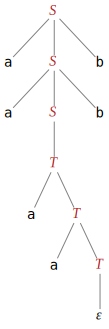

In [4]:
arbol = derivacion.arbol()
arbol